# IMPORTANDO E LENDO AS PRIMEIRAS LINHAS DO .CSV

In [2]:
import pandas as pd 


file_path = "crop_yield.csv"
df = pd.read_csv(file_path)

df.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


# Análise exploratória de dados

In [3]:
df.shape
df.columns

Index(['Crop', 'Precipitation (mm day-1)',
       'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield'],
      dtype='object')

# Informações gerais e valores faltantes

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64

# Estatísticas descritivas

In [5]:
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


# Visualização das distribuições das variáveis

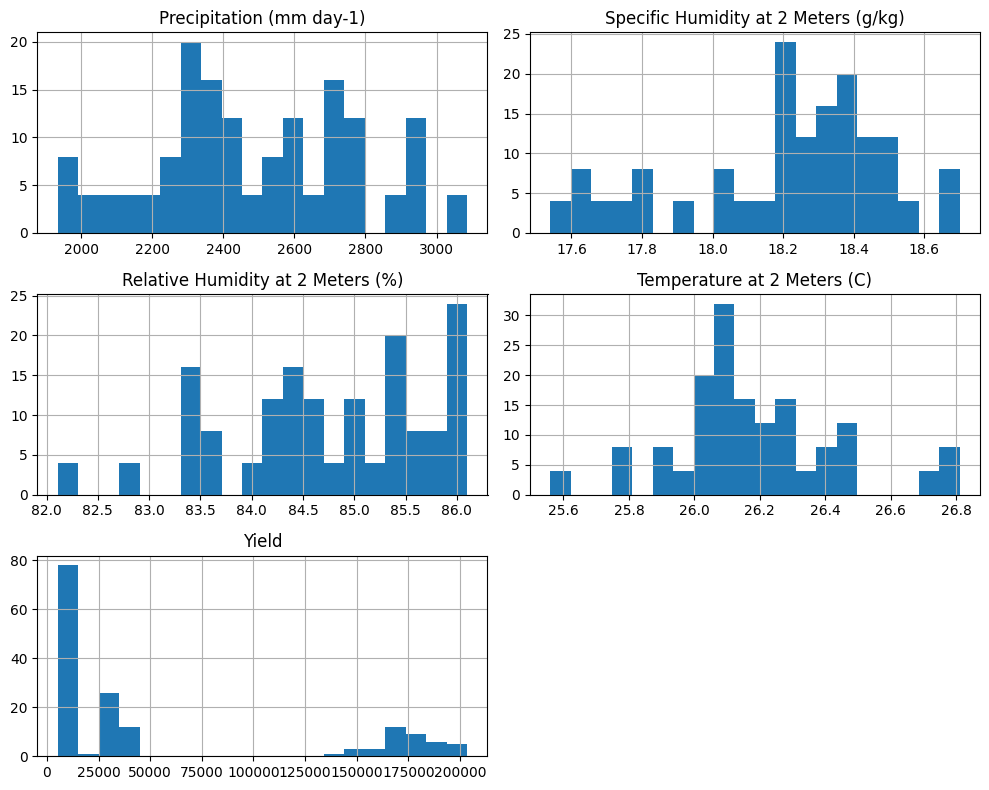

In [6]:
import matplotlib.pyplot as plt

df.hist(figsize=(10,8), bins=20)

plt.tight_layout()
plt.show()

# Análise de correlação

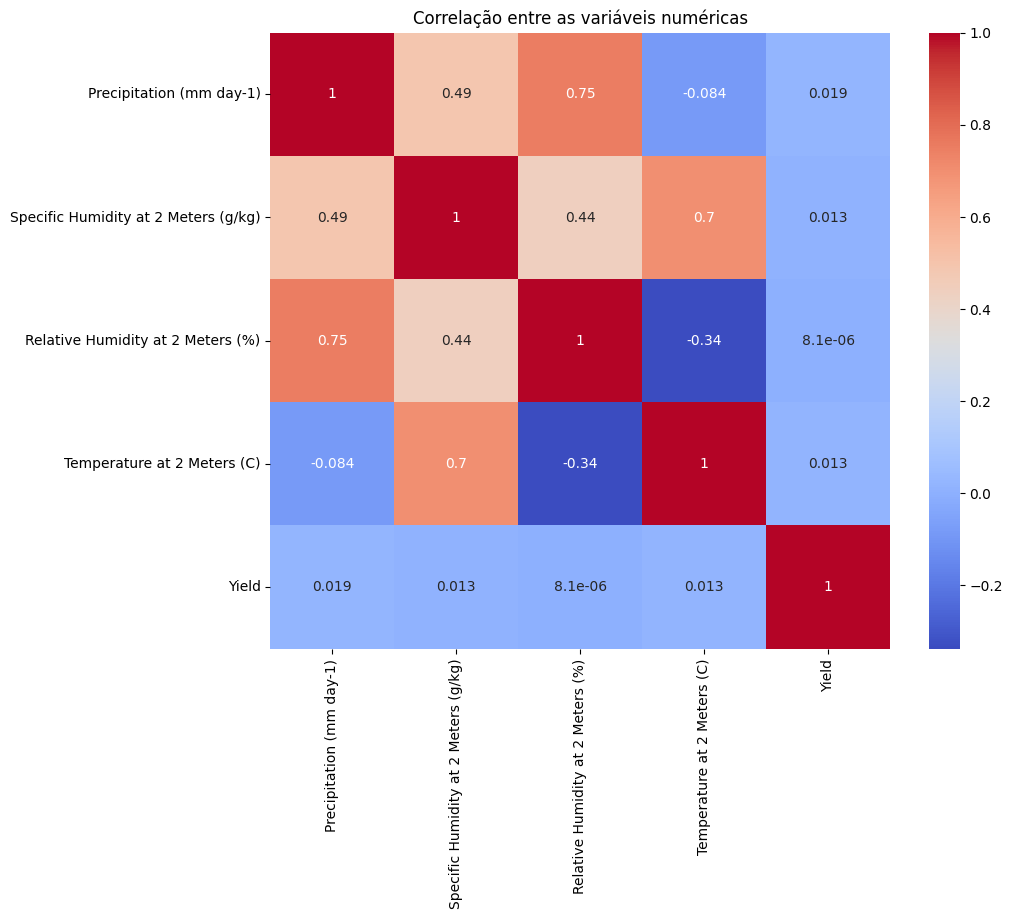

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas colunas numéricas do dataframe original
numericas_df = df.select_dtypes(include=['number'])

# Gerando o heatmap das correlações
plt.figure(figsize=(10,8))
sns.heatmap(numericas_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as variáveis numéricas')
plt.show()


# Tratamento da variável categórica

In [8]:
# Transformação da variável categórica 'Cultura' em variáveis dummy
df_encoded = pd.get_dummies(df, columns=['Yield'], drop_first=True)
df_encoded.head()


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield_5571,Yield_5693,Yield_5765,Yield_5812,Yield_5903,...,Yield_185831,Yield_186959,Yield_189657,Yield_189896,Yield_190626,Yield_195523,Yield_199074,Yield_201436,Yield_202379,Yield_203399
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# VISUALIZANDO OS REDIMENTOS

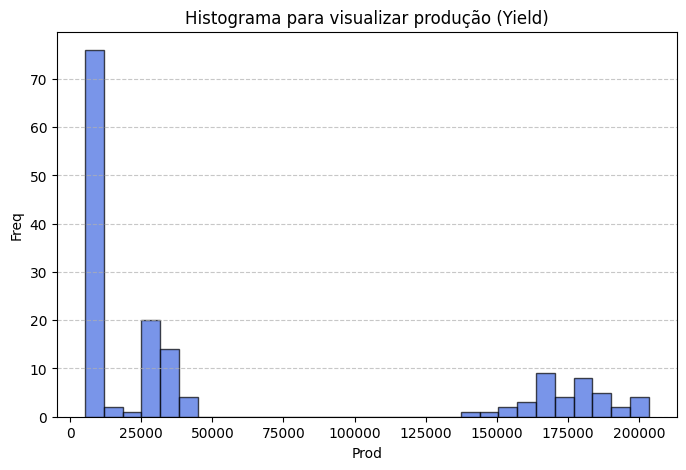

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Yield"], bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title("Histograma para visualizar produção (Yield)")
plt.xlabel("Prod")
plt.ylabel("Freq")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# VISUALIZANDO AS TEMPERATURAS

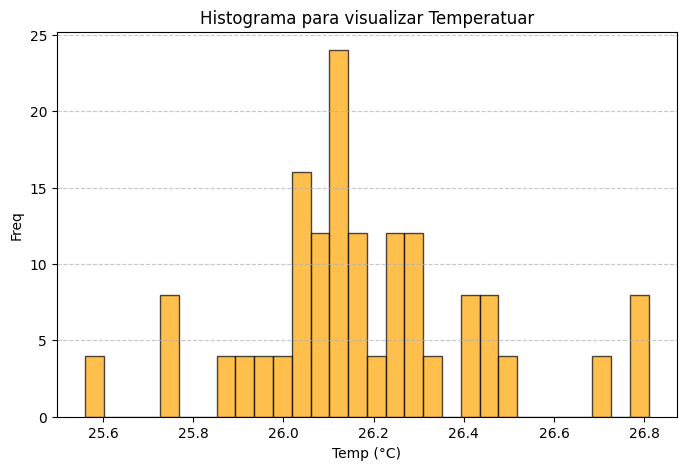

In [10]:
plt.figure(figsize=(8,5))
plt.hist(df["Temperature at 2 Meters (C)"], bins=30, color="orange", edgecolor="black", alpha=0.7)
plt.title("Histograma para visualizar Temperatuar")
plt.xlabel("Temp (°C)")
plt.ylabel("Freq")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ANALISANDO PRODUÇÃO E PROCURANDO OUTLIERS

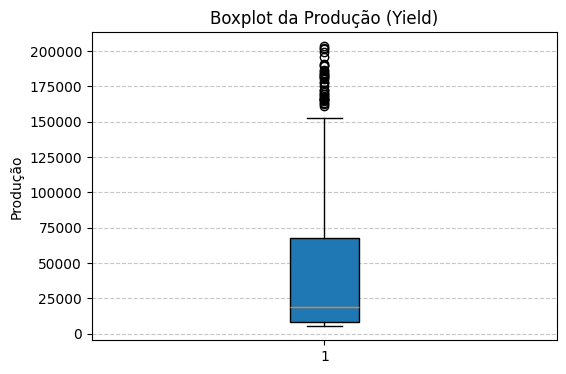

In [11]:
plt.figure(figsize=(6,4))
plt.boxplot(df["Yield"], vert=True, patch_artist=True)
plt.title("Boxplot da Produção (Yield)")
plt.ylabel("Produção")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ENTENDENDO OS OUTLIERS ENCONTRADOS ACIMA

In [12]:
q1 = df["Yield"].quantile(0.25)
q3 = df["Yield"].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr
outliers = df[df["Yield"] > limite_superior]

outliers

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
39,Oil palm fruit,2248.92,17.72,83.40,26.01,169783
40,Oil palm fruit,1938.42,17.54,82.11,26.11,201436
42,Oil palm fruit,2592.35,17.61,85.07,25.56,181826
43,Oil palm fruit,2344.72,17.61,84.12,25.76,178183
44,Oil palm fruit,2339.30,17.70,84.54,25.76,169781
45,Oil palm fruit,2326.09,18.09,84.63,26.11,166042
46,Oil palm fruit,2718.08,18.30,85.43,26.12,165262
47,Oil palm fruit,2061.61,17.80,84.36,25.88,183004
48,Oil palm fruit,1934.62,17.94,83.43,26.21,177543
51,Oil palm fruit,2530.96,18.15,85.33,26.02,172165


In [13]:
media_por_cultura = df.groupby("Crop")["Yield"].mean().sort_values()

media_por_cultura

Crop
Rubber, natural      7824.897436
Cocoa, beans         8883.128205
Rice, paddy         32099.666667
Oil palm fruit     175804.692308
Name: Yield, dtype: float64

# ANALISANDO OS OUTLIERS 
## QUE NA VERDADE SÃO NORMAIS, APENAS UM CROP COM UM BOM RENDIMENTO XD

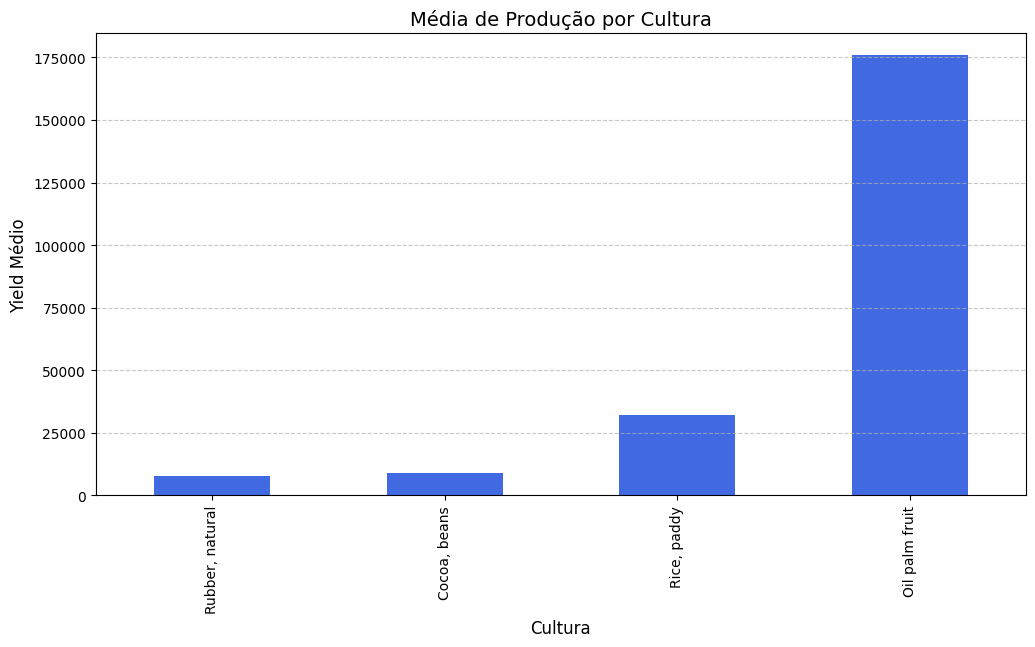

In [14]:
plt.figure(figsize=(12,6))
media_por_cultura.plot(kind="bar", color="royalblue")

plt.title("Média de Produção por Cultura", fontsize=14)
plt.xlabel("Cultura", fontsize=12)
plt.ylabel("Yield Médio", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

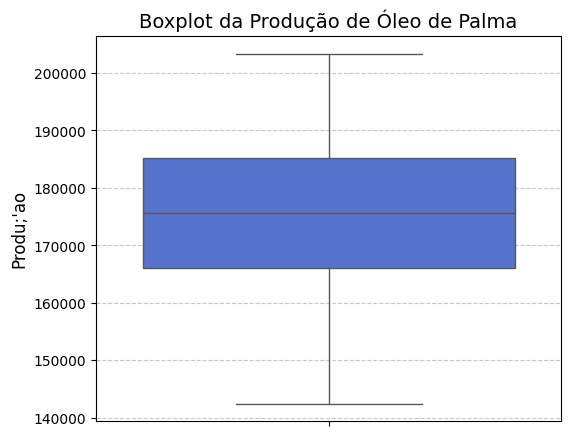

In [15]:
import seaborn as sns

# ANALISANDO O BOXPLOT DO OIL PALM FRUIT PARA TER CERTEZA QUE NÃO ESTÁ ERRADO
oil_palm_fruit_df = df[df["Crop"] == "Oil palm fruit"]

plt.figure(figsize=(6,5))
sns.boxplot(y=oil_palm_fruit_df["Yield"], color="royalblue")

plt.title("Boxplot da Produção de Óleo de Palma", fontsize=14)
plt.ylabel("Produ;'ao", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

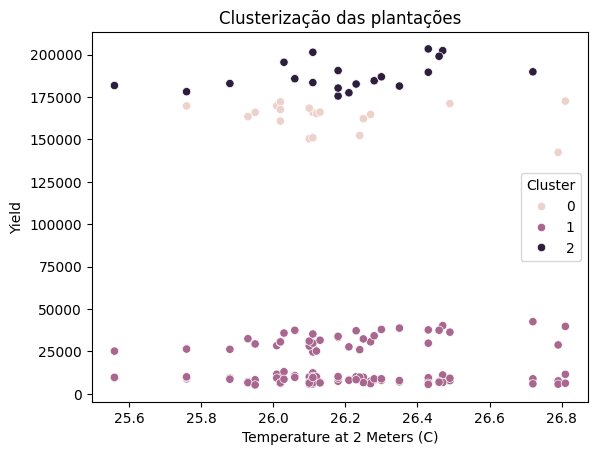

In [16]:
import numpy as np

# Codificando variável categórica "Cultura"
df_encoded = pd.get_dummies(df, columns=['Crop'], drop_first=True)

# Clusterização com KMeans para identificar padrões
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded = df_encoded.select_dtypes(include=[np.number])  # garantir dados numéricos
df['Cluster'] = kmeans.fit_predict(df_encoded)

# Avaliar clusters visualmente
sns.scatterplot(data=df, x='Temperature at 2 Meters (C)', y='Yield', hue='Cluster')
plt.title('Clusterização das plantações')
plt.show()

# Definindo a modelagem preditiva (Regressão Linear, Árvore de Decisão, Floresta Aleatória, XGBoost, Gradient Boosting)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Separando dados de treino e teste

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('Yield', axis=1)
y = df['Yield']

categorical_features = ['Crop']
numerical_features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
                      'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifique o shape dos conjuntos para confirmar sucesso
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 6) (32, 6) (124,) (32,)


# Aplicando Algoritmos de Regressão

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

# Dicionários para armazenar resultados
results = {}
cv_results = {}

# Treinando e avaliando cada modelo
for name, model in models.items():
    # Criando pipeline com preprocessamento e modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Treinando o modelo
    pipeline.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = pipeline.predict(X_test)

    # Calculando métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Predictions': y_pred
    }

    # Faça a Validação Cruzada e guarde os resultados em cv_results
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

    cv_results[name] = cv_scores

    # Correção aqui: usar "name" e "cv_scores"
    print(f"{name}: média R2 = {np.mean(cv_scores):.4f}, Desvio padrão = {np.std(cv_scores):.4f}")

    # print(cv_results)

Regressão Linear: média R2 = -2.3544, Desvio padrão = 4.5752
Árvore de Decisão: média R2 = -0.4100, Desvio padrão = 1.6644
Random Forest: média R2 = 0.1002, Desvio padrão = 1.1192
XGBoost: média R2 = -1.2540, Desvio padrão = 3.7405
KNN: média R2 = -408.2710, Desvio padrão = 495.4593


# Avaliação dos modelos

In [20]:
results_df = pd.DataFrame({
    'MSE': [results[model]['MSE'] for model in models.keys()],
    'RMSE': [results[model]['RMSE'] for model in models.keys()],
    'MAE': [results[model]['MAE'] for model in models.keys()],
    'R2': [results[model]['R2'] for model in models.keys()],
    'R2 Médio (CV)': [cv_results[model].mean() for model in models.keys()],
    'R2 Desvio Padrão (CV)': [cv_results[model].std() for model in models.keys()]
}, index=models.keys())

results_df.sort_values(by='R2', ascending=False)

,MSE,RMSE,MAE,R2,R2 Médio (CV),R2 Desvio Padrão (CV)
Regressão Linear,1.930869e+07,4394.165819,3132.796384,0.995022,-2.354374,4.575209
Random Forest,2.249162e+07,4742.533397,2736.387813,0.994202,0.100185,1.119162
Árvore de Decisão,3.181314e+07,5640.314021,3440.687500,0.991799,-0.409999,1.664431
Gradient Boosting,3.674495e+07,6061.761017,3066.408443,0.990527,-0.969343,3.290510
XGBoost,4.560989e+07,6753.509099,3987.932297,0.988242,-1.253999,3.740463


# Visualização da Comparação dos Modelos

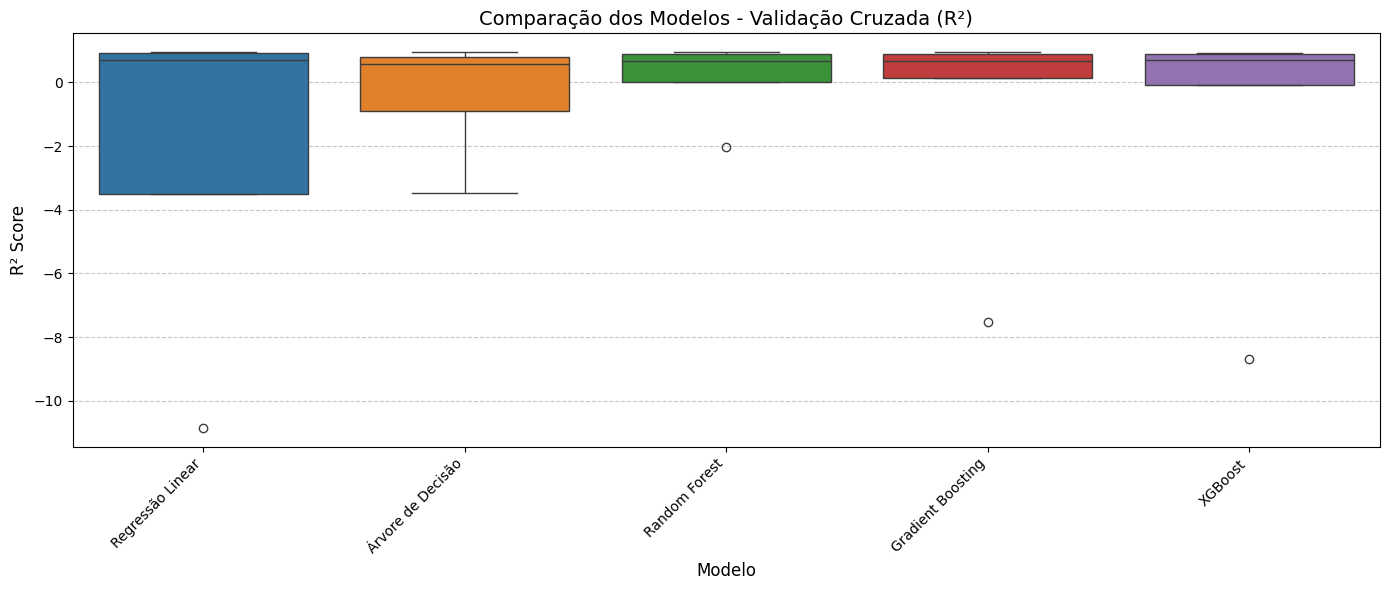

In [21]:
plt.figure(figsize=(14, 6))
cv_data = pd.DataFrame(cv_results)
sns.boxplot(data=cv_data)
plt.title('Comparação dos Modelos - Validação Cruzada (R²)', fontsize=14)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de barras para comparar R2

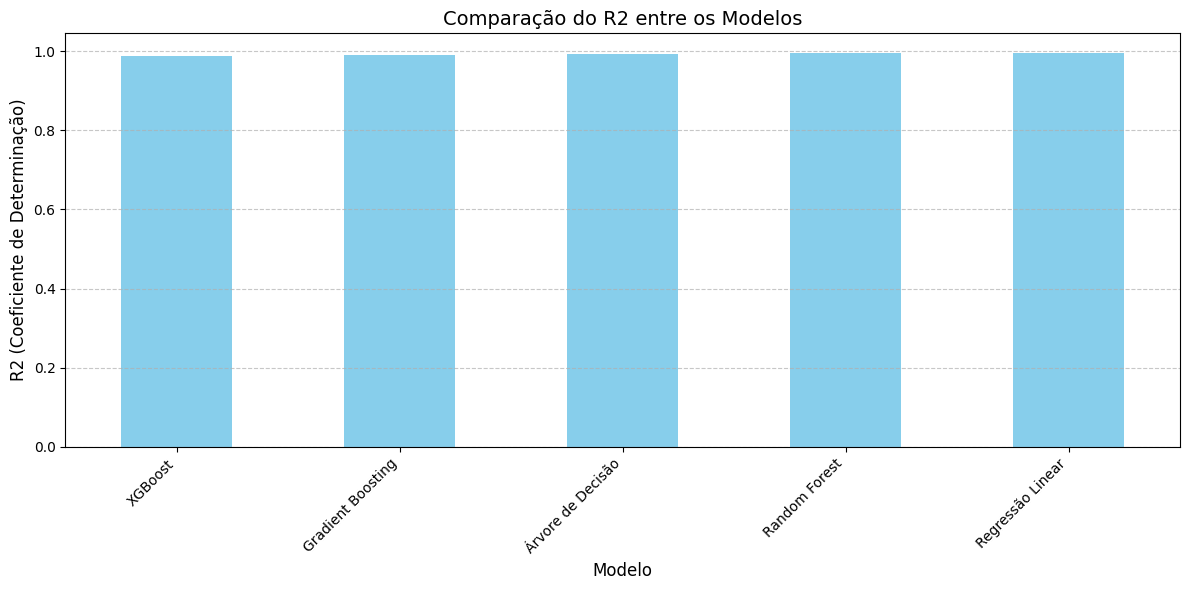

In [22]:
plt.figure(figsize=(12, 6))
results_df.sort_values(by='R2')['R2'].plot(kind='bar', color='skyblue')
plt.title('Comparação do R2 entre os Modelos', fontsize=14)
plt.ylabel('R2 (Coeficiente de Determinação)', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de barras para comparar RMSE

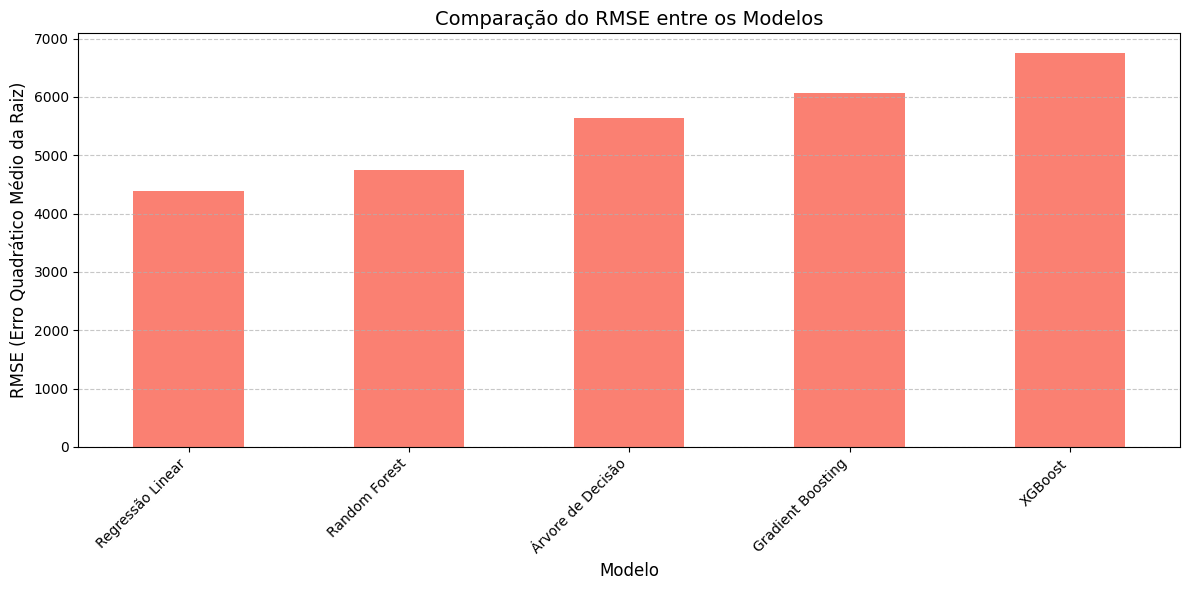

In [23]:
plt.figure(figsize=(12, 6))
results_df.sort_values(by='RMSE')['RMSE'].plot(kind='bar', color='salmon')
plt.title('Comparação do RMSE entre os Modelos', fontsize=14)
plt.ylabel('RMSE (Erro Quadrático Médio da Raiz)', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de dispersão para valores reais vs. previstos (para o melhor modelo)

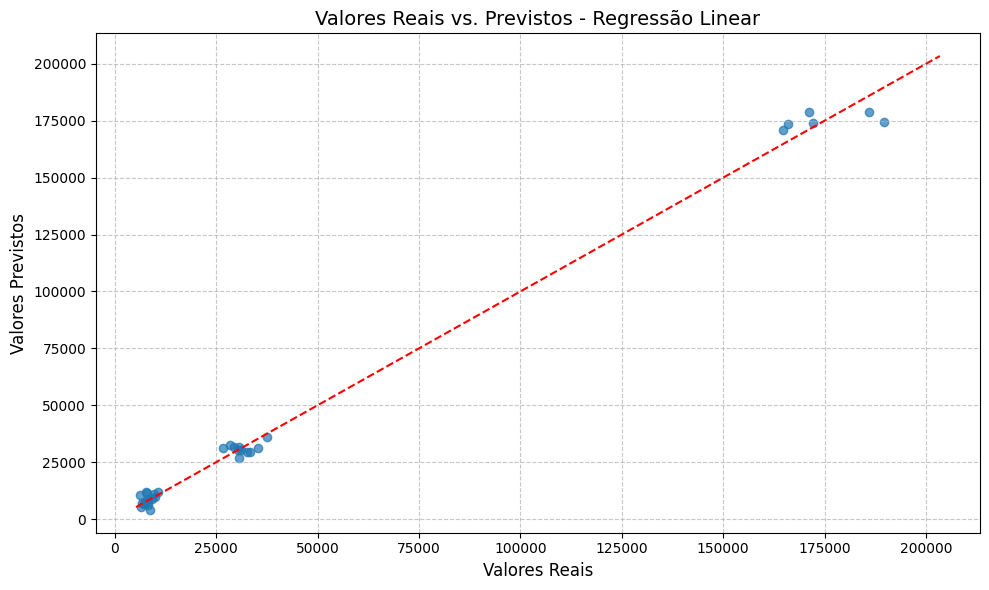

In [24]:
best_model = results_df.sort_values(by='R2', ascending=False).index[0]
plt.figure(figsize=(10, 6))
plt.scatter(y_test, results[best_model]['Predictions'], alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f'Valores Reais vs. Previstos - {best_model}', fontsize=14)
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Previstos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comparação dos modelos com boxplot (validação cruzada)

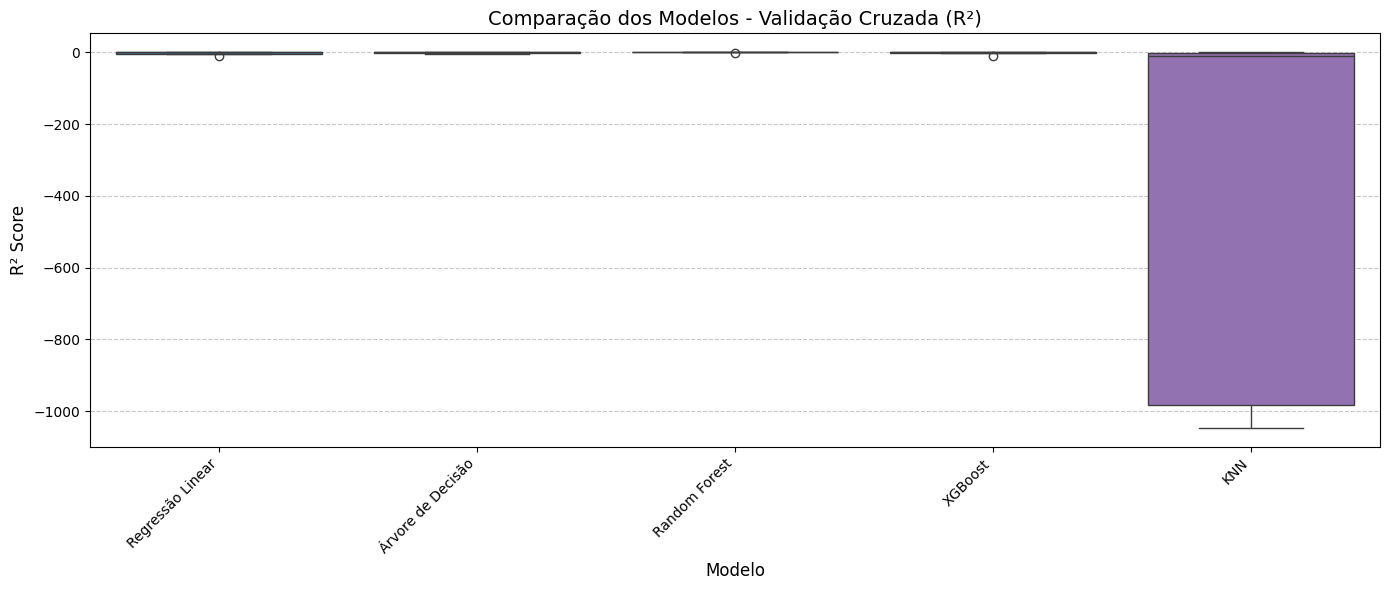

In [35]:
# Comparação dos modelos com boxplot (validação cruzada)
plt.figure(figsize=(14, 6))
cv_data = pd.DataFrame({model: cv_results[model] for model in models.keys()})
sns.boxplot(data=cv_data)
plt.title('Comparação dos Modelos - Validação Cruzada (R²)', fontsize=14)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()